In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract data

In [2]:
results = pd.read_csv("all_info.csv", encoding="utf-8")

In [3]:
results

,dataset,aggregator,n_layers,optimizer__lr,n_head,n_hid,dropout,numerical_passthrough,trial,trial_balanced_accuracy_max,training_iter_sec,non_trainable_params,trainable_params,label,balanced_accuracy_train,balanced_accuracy_val,balanced_accuracy_test,n_parameters,n_trainable
0,sylvine,cls,2,0.005615,2,512,0.199337,True,0,0.864333,5.400447,0,1070400,0,0.973561,0.961200,0.942541,3290721,3290721
1,sylvine,cls,3,0.096973,32,32,0.377600,False,1,0.949579,38.248517,0,3290721,0,0.973561,0.961200,0.942541,3290721,3290721
2,sylvine,cls,4,0.006356,1,64,0.491456,False,2,0.688080,8.777578,0,36225,0,0.973561,0.961200,0.942541,3290721,3290721
3,sylvine,cls,2,0.000444,16,32,0.225905,True,3,0.557634,3.126000,0,157952,0,0.973561,0.961200,0.942541,3290721,3290721
4,sylvine,cls,3,0.000013,4,128,0.029897,False,4,0.501931,7.945999,0,3585921,0,0.973561,0.961200,0.942541,3290721,3290721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,ldpa,max,4,0.056866,1,1024,0.168485,True,25,0.162316,970.861393,0,3169100,4,0.440873,0.438302,0.423968,405771,405771
1436,ldpa,max,2,0.001652,4,256,0.374320,False,26,0.311577,711.008068,0,2651147,4,0.440873,0.438302,0.423968,405771,405771
1437,ldpa,max,1,0.021208,4,256,0.251674,False,27,0.368412,470.559668,0,405771,4,0.440873,0.438302,0.423968,405771,405771
1438,ldpa,max,2,0.000017,8,256,0.491890,False,28,0.141553,97.329034,0,2651147,4,0.440873,0.438302,0.423968,405771,405771


# Adding data

In [4]:
results["balanced_accuracy_train_ds"] = results.groupby(["dataset"], group_keys=False)["balanced_accuracy_train"].transform("max")
results["balanced_accuracy_val_ds"] = results.groupby(["dataset"], group_keys=False)["balanced_accuracy_val"].transform("max")
results["balanced_accuracy_test_ds"] = results.groupby(["dataset"], group_keys=False)["balanced_accuracy_test"].transform("max")

In [5]:
results.columns

Index(['dataset', 'aggregator', 'n_layers', 'optimizer__lr', 'n_head', 'n_hid',
       'dropout', 'numerical_passthrough', 'trial',
       'trial_balanced_accuracy_max', 'training_iter_sec',
       'non_trainable_params', 'trainable_params', 'label',
       'balanced_accuracy_train', 'balanced_accuracy_val',
       'balanced_accuracy_test', 'n_parameters', 'n_trainable',
       'balanced_accuracy_train_ds', 'balanced_accuracy_val_ds',
       'balanced_accuracy_test_ds'],
      dtype='object')

# Correlation matrix

In [50]:
results[[
    "aggregator",
    "n_layers", 
    #"optimizer__lr", 
    "n_head", 
    "n_hid",
    #"dropout", 
    "numerical_passthrough",
    "label"
       ]].corr()

,n_layers,n_head,n_hid,numerical_passthrough,label
n_layers,1.000000,-0.042960,-0.032688,-0.069196,-0.005146
n_head,-0.042960,1.000000,-0.004937,-0.044730,0.072091
n_hid,-0.032688,-0.004937,1.000000,0.021410,-0.024455
numerical_passthrough,-0.069196,-0.044730,0.021410,1.000000,0.058956
label,-0.005146,0.072091,-0.024455,0.058956,1.000000


# Distribution functions (?)

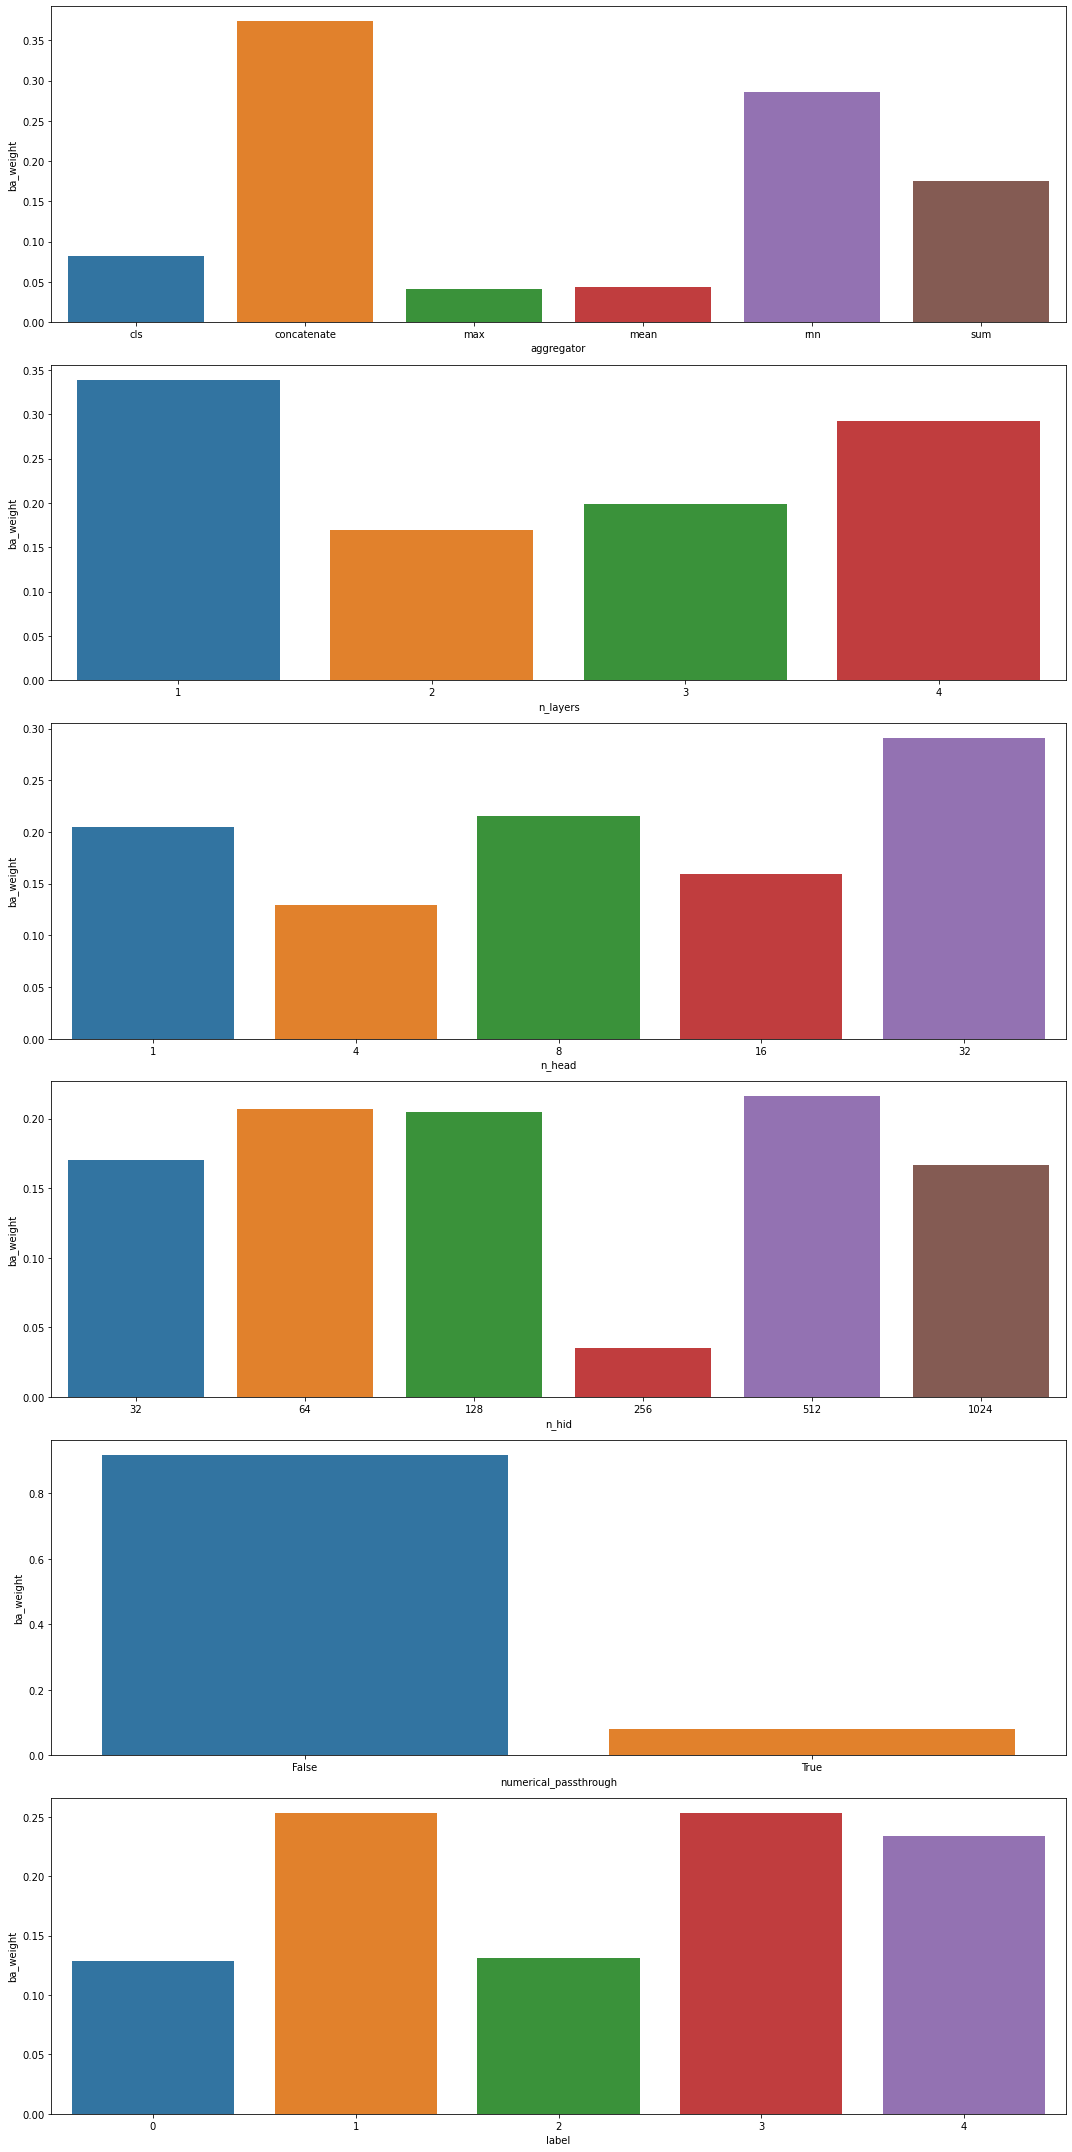

In [48]:
plot_df = results

plot_df = plot_df \
.groupby(["dataset"], group_keys=False) \
.apply(lambda g: g.sort_values(["trial_balanced_accuracy_max"], ascending=False).head(3)) 

plot_df["ba_weight"] = plot_df["trial_balanced_accuracy_max"] / plot_df["balanced_accuracy_val_ds"]
plot_df["ba_weight"] = plot_df["ba_weight"] / plot_df["ba_weight"].sum()
# plot_df["ba_weight"] = np.exp(plot_df["ba_weight"]) / np.exp(plot_df["ba_weight"]).sum()

columns = [
    "aggregator",
    "n_layers", 
    #"optimizer__lr", 
    "n_head", 
    "n_hid",
    #"dropout", 
    "numerical_passthrough",
    "label"
]

fig, axs = plt.subplots(nrows=len(columns), figsize=(15,len(columns) * 5))

for column_idx, column in enumerate(columns):
    plot_column_df = plot_df \
        .groupby([column], group_keys=False) \
        .sum() \
        .reset_index() 

    sns.barplot(x=plot_column_df[column], y=plot_column_df["ba_weight"], ax=axs[column_idx])
    
fig.tight_layout()

## Accuracy vs hyperparameters search iteration (fail)

In [ ]:
columns = FIG_COLS
rows = math.ceil(len(DATASETS) / FIG_COLS)

fig, axes = plt.subplots(rows, columns, figsize=(15,9))

for ds_idx, plot_ds in enumerate(DATASETS):
    row = math.floor(ds_idx / FIG_COLS)
    col = ds_idx % columns
    ax = axes[row, col]
    for k_agg_idx, k_agg in enumerate(results[plot_ds]):
        
        sorted_by_trial_results = {k: v for k, v in sorted(results[plot_ds][k_agg].items(), key=lambda item: item[1]["trial"])}
        b_accuracies = [sorted_by_trial_results[trial]["balanced_accuracy_max"] for trial in sorted_by_trial_results]

        ax.plot(
            list(results[plot_ds][k_agg].keys()),            
            b_accuracies,
            label=k_agg
        )

#Use adjustable='box-forced' to make the plot area square-shaped as well.
#ax.set_aspect('equal', adjustable='datalim')
    ax.set_title(plot_ds)
    ax.plot()  #Causes an autoscale update.
    ax.legend()
    
fig.tight_layout()
plt.show()

## Parameters vs Accuracy

In [ ]:
columns = FIG_COLS
rows = math.ceil(len(DATASETS) / FIG_COLS)

fig, axes = plt.subplots(rows, columns, figsize=(15,9))

for ds_idx, plot_ds in enumerate(DATASETS):
    row = math.floor(ds_idx / FIG_COLS)
    col = ds_idx % columns
    ax = axes[row, col]

    for k_agg_idx, k_agg in enumerate(results[plot_ds]):

        n_params =  [results[plot_ds][k_agg][trial]["trainable_params"] for trial in results[plot_ds][k_agg]]
        b_accuracies = [results[plot_ds][k_agg][trial]["balanced_accuracy_max"] for trial in results[plot_ds][k_agg]]

        ax.scatter(
            n_params,
            b_accuracies,
            marker=["o", "+", "*", "P", "D", "X"][k_agg_idx],
            label=k_agg,
        )

    #Use adjustable='box-forced' to make the plot area square-shaped as well.
    #ax.set_aspect('equal', adjustable='datalim')
    ax.set_title(plot_ds)
    ax.legend()
    ax.plot()   #Causes an autoscale update.
    
fig.tight_layout()
plt.show()

## Aggregator vs Accuracy vs Num of params

In [ ]:
columns = FIG_COLS
rows = math.ceil(len(DATASETS) / FIG_COLS)

fig, axes = plt.subplots(rows, columns, figsize=(15,9))

for ds_idx, plot_ds in enumerate(DATASETS):
    row = math.floor(ds_idx / FIG_COLS)
    col = ds_idx % columns
    ax = axes[row, col]

    for k_agg_idx, k_agg in enumerate(results[plot_ds]):
        for trial in results[plot_ds][k_agg]:

            ax.add_patch(
                plt.Circle(
                    (k_agg_idx, results[plot_ds][k_agg][trial]["balanced_accuracy_max"]),
                    results[plot_ds][k_agg][trial]["trainable_params"] / 100000000, 
                    color='#000033', 
                    alpha=0.1
                )
            )

    #Use adjustable='box-forced' to make the plot area square-shaped as well.
    ax.set_aspect('equal', adjustable='datalim')
    #ax.set_ylim([0, 1])
    ax.set_title(plot_ds)
    ax.plot()   #Causes an autoscale update.
    
fig.tight_layout()
plt.show()

## Aggregator vs accuracy

In [ ]:
columns = FIG_COLS
rows = math.ceil(len(DATASETS) / FIG_COLS)

fig, axes = plt.subplots(rows, columns, figsize=(15,9))

for ds_idx, plot_ds in enumerate(DATASETS):
    row = math.floor(ds_idx / FIG_COLS)
    col = ds_idx % columns
    ax = axes[row, col]
    
    means = []
    stds = []
    
    for k_agg_idx, k_agg in enumerate(results[plot_ds]):
        
        ax.scatter(
            k_agg, 
            eval_results[plot_ds][k_agg]["balanced_accuracy_val"],
            label=k_agg + "_max",
            marker="+"
        )

        #for trial in results[plot_ds][k_agg]:
        
        b_accs = [results[plot_ds][k_agg][trial]["balanced_accuracy_max"] for trial in results[plot_ds][k_agg]]
        mean = np.mean(b_accs)
        std = np.std(b_accs)
        
        means.append(mean)
        stds.append(std)
        
        
    ax.errorbar(
        list(results[plot_ds].keys()), # Get aggregators
        means, 
        stds, 
        linestyle="None", 
        marker="^"
    )
            
            
    ax.set_title(plot_ds)
    #Use adjustable='box-forced' to make the plot area square-shaped as well.
    #ax.set_aspect('equal', adjustable='datalim')
    #ax.legend()
    ax.plot()   #Causes an autoscale update.
    
fig.tight_layout()
plt.show()

In [ ]:
columns = FIG_COLS
rows = math.ceil(len(DATASETS) / FIG_COLS)

fig, axes = plt.subplots(rows, columns, figsize=(15,9))

for ds_idx, plot_ds in enumerate(DATASETS):
    row = math.floor(ds_idx / FIG_COLS)
    col = ds_idx % columns
    ax = axes[row, col]
    for k_agg_idx, k_agg in enumerate(results[plot_ds]):
        
        ax.scatter(
            k_agg, 
            eval_results[plot_ds][k_agg]["balanced_accuracy_val"],
            label=k_agg + "_max",
            marker="+"
        )

        for trial in results[plot_ds][k_agg]:

            ax.scatter(
                k_agg, 
                results[plot_ds][k_agg][trial]["balanced_accuracy_max"],
                label=k_agg
            )
            
            
            
    ax.set_title(plot_ds)
    #Use adjustable='box-forced' to make the plot area square-shaped as well.
    #ax.set_aspect('equal', adjustable='datalim')
    #ax.legend()
    ax.plot()   #Causes an autoscale update.
    
fig.tight_layout()
plt.show()

## Aggregator vs train, val, test accuracy

In [ ]:
columns = FIG_COLS
rows = math.ceil(len(DATASETS) / FIG_COLS)

fig, axes = plt.subplots(rows, columns, figsize=(15,9))

for ds_idx, plot_ds in enumerate(DATASETS):
    row = math.floor(ds_idx / FIG_COLS)
    col = ds_idx % columns
    ax = axes[row, col]
    
    for partition_idx, partition in enumerate(["train", "val", "test"]):        
        x = []
        y = []
    
        for k_agg_idx, k_agg in enumerate(results[plot_ds]):
            x.append(k_agg)
            y.append(eval_results[plot_ds][k_agg]["balanced_accuracy_" + partition])
        
        ax.scatter(
            x, 
            y,
            marker=["o", "+", "*"][partition_idx],
            label=partition
        )
            
    ax.set_title(plot_ds)
    #Use adjustable='box-forced' to make the plot area square-shaped as well.
    #ax.set_aspect('equal', adjustable='datalim')
    ax.legend()
    ax.plot()   #Causes an autoscale update.

fig.tight_layout()
plt.show()

## Config vs accuracy

In [ ]:
all_configs = []

for k_ds in DATASETS:
    this_config  = {"dataset": k_ds}
    
    for k_agg in results[k_ds]:
        this_config["aggregator"] = k_agg
        
        for k_trial in results[k_ds][k_agg]:
            all_configs.append({
                **this_config, 
                **results[k_ds][k_agg][k_trial]["config"],
                "balanced_accuracy_max": results[k_ds][k_agg][k_trial]["balanced_accuracy_max"]
            })  
    

In [ ]:
config_df = pd.DataFrame(all_configs)
config_df = pd.merge(config_df, ds_info_df, left_on="dataset", right_on="name", how="left")


# One hot encoding
#config_df = pd.get_dummies(config_df, columns=["aggregator"], prefix="aggregator", prefix_sep="_")
#config_df = pd.get_dummies(config_df, columns=["label"], prefix="label", prefix_sep="_")


# Label encoding
config_df["aggregator"] = config_df["aggregator"].astype("category").cat.codes


config_df["numerical_passthrough"] = config_df["numerical_passthrough"].astype("category").cat.codes

In [ ]:
config_df

In [ ]:
config_df.columns

In [ ]:
dropable_columns = [    
    "dataset",
    "name",
    "features_instances", 
    "percent_numerical", 
    "percent_missing_values",
    "label"
]

clean_config_df = config_df.drop(dropable_columns, axis=1) 
config_vectors = clean_config_df.values
#scaler = preprocessing.MinMaxScaler()
scaler = preprocessing.StandardScaler()
config_vectors = scaler.fit_transform(config_vectors)

In [ ]:
clean_config_df

# Correlation matrix

In [ ]:
fig = plt.figure(figsize=(11,11))
sns.heatmap(clean_config_df.corr(), vmin=-1, vmax=1, center=0, annot=True, fmt='.2f')

In [ ]:
pca = manifold.TSNE(n_components=2, random_state=11)
#pca = decomposition.PCA(n_components=2, random_state=11)
plot_vectors = pca.fit_transform(config_vectors)

In [ ]:
plt.axis("off")
plt.title("Configurations")
_ = plt.scatter(plot_vectors[:, 0], plot_vectors[:, 1])

# Multiple colorings

In [ ]:
colors = ["red", "black", "purple", "blue", "orange", "cyan", "green", "gray", "pink"]
markers = ['o', 's', 'D', '^', 'v', '*', '.', ',' ]

In [ ]:
list(clean_config_df.keys())

In [ ]:
clean_config_df["dropout"].astype("category")

In [ ]:
fig, axs = plt.subplots(clean_config_df.shape[1] // 3 + 1, 3, figsize=(15, 20))

for ax_idx, ax in enumerate(axs.flat):
    #ax.axis("off")
    
    if ax_idx >= clean_config_df.shape[1]:
        continue 
        
    group_name = str(clean_config_df.keys()[ax_idx])
    color_attributes = clean_config_df[group_name].values.astype(int)

    ax.set_title(f"Configurations grouped by {group_name}")
    for coloring_idx, coloring_attr in enumerate(set(color_attributes)):
        indices = np.argwhere(color_attributes == coloring_attr).flatten()
        _ = ax.scatter(
            plot_vectors[indices, 0], 
            plot_vectors[indices, 1], 
            marker=markers[coloring_idx % len(markers)]
        )
        
fig.tight_layout()

# Clustering

In [ ]:
#clustering = cluster.DBSCAN(eps=1.8)
clustering = cluster.KMeans(n_clusters=5)
clustering.fit(config_vectors)

In [ ]:
colors = ["red", "black", "purple", "blue", "orange", "cyan", "green", "gray", "pink"]
markers = ['o', 's', 'D', '^', 'v', '*', '.', ',' ]
print("Available labels:", set(clustering.labels_))

In [ ]:
plt.axis('off')

plt.title("Datasets clusters")

for label_idx, label in enumerate(set(clustering.labels_)):
    indices = np.argwhere(clustering.labels_ == label).flatten()
    _ = plt.scatter(
        plot_vectors[indices, 0], 
        plot_vectors[indices, 1], 
        marker=markers[label_idx % len(markers)]
    )
    
    #plt.savefig("assets/datasets_clusters.png", dpi=300)